
# Linear Regression Example
The example below uses a [marketing](https://scikit-learn.org/stable/datasets/toy_dataset.html) dataset,
in order to illustrate a linear regression activity.

Workflow:



1. Preparation
    1. Load the dataset from a `.csv` file and show a short description
    1. Show the two dimensional scatter plots for all the predicting variables with respect to the target
    1. Split the data into *predicting variables* `X` and *target* `y`
        1. here we set the `random_state` variable to make the experiment *repeatable* 
1. First experiment: compute the regression on a single predicting variable
    1. Consider a reduced dataset containing the chosen variable and the target
    1. Fit the `LinearRegression` estimator on the training set
    1. Show the statistical significance of the fitted model
    1. Predict the target for the test set using the *fitted* estimator
    1. Compute the regression coefficients and the quality measures: *Root Mean Squared Error (RMSE)* and *coefficient of determination (r2)*
1. Second experiment: compute the regression considering all the predicting variables
    1. Repeat the steps from 2.2 to 2.5
1. Third experiment: use the `DecisionTreeRegressor` with the entire dataset
    1. Fit the tree using the default hyperparameters, in order to find the 
    maximum depth of the unconstrained tree
    1. Use *cross-validation* to find the optimal *maximum depth* of the tree
    1. Fit the tree with the optmal `max_depth`
    1. Predict and show the *root mean squared error*
1. Fourth experiment: use the `RandomForestRegressor`
    1. Repeat steps from 4.2 to 4.4 (for simplicity, we use the maximum `max_depth` found in 4.1)


In [453]:
# Code source: Claudio Sartori 
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from sklearn.model_selection import train_test_split

random_state = 94922767 # this will be used to guarantee the repeatability of the experiment

## Load the dataset from a `.xlsx` file and show a short description

In [454]:
# This cell allows full compatibility between execution in Google Colab and in local
try:
  import google.colab.files
  IN_COLAB = True
except:
  IN_COLAB = False
# from google.colab import files
if IN_COLAB:
    uploaded = files.upload()

In [455]:
# The file must be available in the same directory, 
# or uploaded in the Colab environment 
# in the execution of the previous cell
data_fn = 'FoodUK2014.xlsx'
df0 = pd.read_excel(data_fn)

## Data Exploration and preparation

##### Show a short description of the columns

In [456]:
df0.head()

,hhsize,quarter,adults_n,children_n,totalexp,SexHRP,month,Gorx,Year,income,AgeHRP,qmeat,qfish,qfv,xmeat,xfish,xfv,uvmeat,uvfish,uvfv
0,4,April to June,2,2,556.213795,Female,April,West Midlands,2014,985.655,34,13.745333,NaN,37.301331,96.156670,NaN,69.268333,6.995586,NaN,1.856993
1,4,July to September,2,2,737.685635,Male,August,North East,2014,824.520,38,6.045000,0.650000,30.203335,53.278336,6.500000,62.833336,8.813621,10.000000,2.080344
2,2,October to December,2,0,330.775000,Male,October,Northern Ireland,2014,271.925,54,11.780167,2.088667,17.032166,93.838333,28.491667,42.813335,7.965790,13.641079,2.513675
3,2,April to June,2,0,536.742283,Male,June,North West and Merseyside,2014,611.490,64,2.745167,NaN,4.008333,16.856667,NaN,5.416667,6.140490,NaN,1.351351
4,3,April to June,3,0,880.787157,Male,April,East Midlands,2014,496.040,64,12.857000,2.903333,7.345000,73.623337,16.921667,19.261665,5.726323,5.828358,2.622419


In [457]:
df0.describe(include='all') # so to show NaNs

,hhsize,quarter,adults_n,children_n,totalexp,SexHRP,month,Gorx,Year,income,AgeHRP,qmeat,qfish,qfv,xmeat,xfish,xfv,uvmeat,uvfish,uvfv
count,5114.000000,5114,5114.000000,5114.000000,5114.000000,5114,5114,5114,5114.0,5114.000000,5114.000000,4873.000000,3542.000000,5017.000000,4873.000000,3542.000000,5017.000000,4873.000000,3542.000000,5017.000000
unique,NaN,4,NaN,NaN,NaN,2,12,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,April to June,NaN,NaN,NaN,Male,November,South East,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1341,NaN,NaN,NaN,3050,445,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2.363707,NaN,1.841807,0.521901,519.898868,NaN,NaN,NaN,2014.0,679.542002,53.802698,10.475023,2.146960,25.727801,68.108342,19.635469,58.943391,7.072523,9.934257,2.508315
std,1.244704,NaN,0.743052,0.945622,411.543093,NaN,NaN,NaN,0.0,499.596175,16.187912,8.798118,2.034353,18.371345,57.347230,18.725096,44.751694,2.931651,5.485175,1.358023
min,1.000000,NaN,0.000000,0.000000,-246.916821,NaN,NaN,NaN,2014.0,0.000000,17.000000,0.086667,0.108333,0.060667,0.195000,0.000000,0.520000,0.357694,0.000000,0.159672
25%,1.000000,NaN,1.000000,0.000000,260.598783,NaN,NaN,NaN,2014.0,306.954000,41.000000,4.452500,0.866667,12.222167,29.141668,6.917083,27.148333,5.171614,5.979375,1.760525
50%,2.000000,NaN,2.000000,0.000000,426.977227,NaN,NaN,NaN,2014.0,548.086000,54.000000,8.374167,1.625000,22.245817,54.708336,13.736667,49.356667,6.575851,8.804690,2.254208
75%,3.000000,NaN,2.000000,1.000000,651.003763,NaN,NaN,NaN,2014.0,925.652500,67.000000,14.005333,2.816667,35.037167,90.480003,26.000000,78.281662,8.295746,12.520942,2.893561


##### Show the number of rows with nulls

It is computed subtracting the number of rows in the dataset without nulls from the original number of rows

In [458]:
no_null_rows = df0.shape[0] - df0.dropna().shape[0] 
print(no_null_rows)

1668


#### Drop rows with nulls

In [459]:
df = df0.dropna().copy() # copy suppresses the SettingWithCopy warning?

##### Data transormation
- Convert the alphanumeric SexHRP into numeric 0 and 1
    - the `sklearn` machine learning procedures work only with numeric predicting
      attributes
- Generate two new columns as ratio of other columns
    - this is suggested by background information

In [460]:
df['SexHRP'] = df['SexHRP'].apply(lambda x : 0 if x == 'Male' else 1)
df['qmeat_hhsize_ratio'] = df['qmeat']/df['hhsize']
df['income_hhsize_ratio'] = df['income']/df['hhsize']
df.head()

,hhsize,quarter,adults_n,children_n,totalexp,SexHRP,month,Gorx,Year,income,...,qfish,qfv,xmeat,xfish,xfv,uvmeat,uvfish,uvfv,qmeat_hhsize_ratio,income_hhsize_ratio
1,4,July to September,2,2,737.685635,0,August,North East,2014,824.520,...,0.650000,30.203335,53.278336,6.500000,62.833336,8.813621,10.000000,2.080344,1.511250,206.130000
2,2,October to December,2,0,330.775000,0,October,Northern Ireland,2014,271.925,...,2.088667,17.032166,93.838333,28.491667,42.813335,7.965790,13.641079,2.513675,5.890083,135.962500
4,3,April to June,3,0,880.787157,0,April,East Midlands,2014,496.040,...,2.903333,7.345000,73.623337,16.921667,19.261665,5.726323,5.828358,2.622419,4.285667,165.346667
5,4,January to March,2,2,372.275578,0,February,Wales,2014,266.530,...,1.789667,27.378000,303.181671,28.773333,86.558327,8.451528,16.077482,3.161602,8.968250,66.632500
7,3,January to March,3,0,151.750522,0,January,Eastern,2014,403.180,...,3.003000,6.742667,72.258331,26.000000,17.376667,5.904745,8.658009,2.577121,4.079111,134.393333


##### Use only the columns that the experts consider interesting
This is suggested by background information

In [461]:
df = df[['adults_n', 'children_n', 'SexHRP', 
    'AgeHRP', 'qmeat_hhsize_ratio', 'income_hhsize_ratio', 'uvmeat']] # drop all except these
df.head()

,adults_n,children_n,SexHRP,AgeHRP,qmeat_hhsize_ratio,income_hhsize_ratio,uvmeat
1,2,2,0,38,1.511250,206.130000,8.813621
2,2,0,0,54,5.890083,135.962500,7.965790
4,3,0,0,64,4.285667,165.346667,5.726323
5,2,2,0,70,8.968250,66.632500,8.451528
7,3,0,0,64,4.079111,134.393333,5.904745


## Choose the target and split the data into *predicting variables* `X` and *target* `y`

In [462]:
X = df.drop('qmeat_hhsize_ratio', axis=1)
y = df['qmeat_hhsize_ratio']

## Show the two dimensional scatter plots for all the predicting variables with respect to the target

In [463]:
ncols=3
import math
nrows = math.ceil((df.shape[1]-1)/ncols)
figwidth = ncols * 7
figheigth = nrows*5

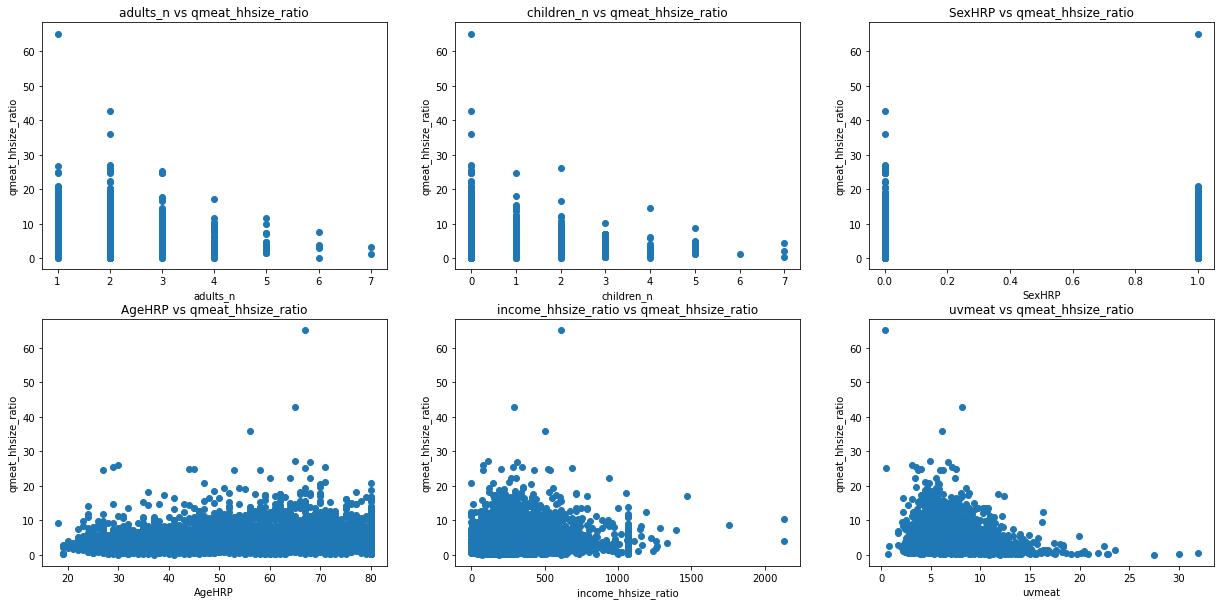

In [464]:
fig, ax = plt.subplots(ncols=ncols, nrows=nrows, figsize=(figwidth, figheigth)) # knew from looking at function definition
for feature, axis in zip(X.columns, ax.flatten()) : 
    axis.set_title("{} vs qmeat_hhsize_ratio".format(feature))
    axis.set_xlabel(feature)
    axis.set_ylabel('qmeat_hhsize_ratio')
    axis.scatter(X[feature], y)

### Show the *_p-values_* of the target with respect to the variables

In [465]:
from sklearn.feature_selection import f_regression
_, p_values = f_regression(X, y)
table = pd.DataFrame({'Variable' : X.columns, 'p_value' : p_values})
table

,Variable,p_value
0,adults_n,1.415945e-05
1,children_n,1.077386e-30
2,SexHRP,8.429827e-02
3,AgeHRP,1.710126e-21
4,income_hhsize_ratio,1.211099e-03
5,uvmeat,4.789746e-52


## Split the data into *train* and *test* and show the sizes of the two parts
Here we set the `random_state` variable to make the experiment *repeatable*


In [466]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=random_state, train_size=0.7)
print("test set size is {}, train set size is {}".format(Xtrain.shape[0], Xtest.shape[0])) 

test set size is 2412, train set size is 1034


### Consider a reduced dataset containing the chosen variable and the target

In [467]:
variable_for_prediction = 'adults_n'
Xtrain_reduced = Xtrain[variable_for_prediction]
Xtest_reduced = Xtest[variable_for_prediction]

### Fit the `linear_model` estimator on the training set and predict the target for the test set using the *fitted* estimator

In [468]:
Xtrain_reduced = np.array(Xtrain_reduced).reshape(-1, 1) # fkcing error, it needs 2D array
Xtest_reduced = np.array(Xtest_reduced).reshape(-1, 1)

lr_model = linear_model.LinearRegression()
lr_model.fit(Xtrain_reduced, ytrain)
y_train_p = lr_model.predict(Xtrain_reduced)
y_test_p = lr_model.predict(Xtest_reduced)

#### Compute the regression coefficients and the quality measures
Create a function to compute the F-statistic and p-value of the regression model

In [469]:
# Computation of F-statistic and p-value for the regression
# http://facweb.cs.depaul.edu/sjost/csc423/documents/f-test-reg.htm
def F_statistic(ytrue, ypred, p, n_obs) : # n_obv, aka row number, p is the number of regression params
    p = p + 1 # there's always another variable 
    ypred = np.array(ypred)
    ytrue = np.array(ytrue)
    y_true_avg = np.average(ytrue)
    SSE = np.sum((ytrue - ypred)**2)
    SSM = np.sum((ypred - y_true_avg)**2)
    DFM = p - 1
    DFE = n_obs - p
    F_stat = (SSM/DFM) / (SSE/DFE)
    p = 1-scipy.stats.f.cdf(F_stat, DFM, DFE) # how the fuck was i supposed to know this? 
    return F_stat, p

#### Compute the statistical significance of the model
(and the statistical quality measures)

In [470]:
Fval, pval = F_statistic(ytrain, y_train_p, 1, Xtrain_reduced.shape[0])
coeff = lr_model.coef_[0] # the coefficient is returned as a one-element list, since we only have one variable. 
intercept = lr_model.intercept_
# The root mean squared error
rmse = mean_squared_error(ytest, y_test_p)
r2 = r2_score(ytest, y_test_p)

# The results are assembled in a dataframe for a compact view
pd.DataFrame({'Univariate Linear - Value' : [intercept
                        , coeff
                        , rmse
                        , r2
                        , Fval
                        , pval]}
            , index = ['Intercept for "{}"'.format(variable_for_prediction)
                     , 'Coefficient for "{}"'.format(variable_for_prediction)
                     , 'rmse'
                     , 'r2'
                     , 'f-statistic'
                     , 'p-value'])


,Univariate Linear - Value
"Intercept for ""adults_n""",5.646984
"Coefficient for ""adults_n""",-0.326893
rmse,15.103508
r2,0.007595
f-statistic,9.841162
p-value,0.001727


## Second experiment: compute the regression considering all the predicting variables

### Now we use the entire data in `X_train` and `X_test` for fitting and predicting

In [471]:
lr_model_full = linear_model.LinearRegression()
lr_model_full.fit(Xtrain, ytrain)
y_train_p_full = lr_model_full.predict(Xtrain)
y_test_p_full = lr_model_full.predict(Xtest)

### Fit, predict and show the results
Now we see the *regression coefficients* resulting from the fitting. 

In particular, *positive coefficients* indicate that the target *increases* with the variable, *negative coefficients* indicate a *decreasing* trend.

The absolute values of the coefficient cannot be considered directly a measure of importance, due to the possibly different orders of magnitude of the data in the different columns (observe above the outputs of `describe`).

In [472]:
pd.DataFrame({"variable" : X.columns, "coefficient" : lr_model_full.coef_})


,variable,coefficient
0,adults_n,-0.318682
1,children_n,-0.650924
2,SexHRP,-0.383162
3,AgeHRP,0.014913
4,income_hhsize_ratio,0.000989
5,uvmeat,-0.392620


#### Compute the statistical significance

In [473]:
_, p_values_multi = f_regression(Xtrain, y_train_p_full)
table_multi = pd.DataFrame({'Variable' : X.columns, 'p_value' : p_values_multi})
table_multi

,Variable,p_value
0,adults_n,4.812836e-19
1,children_n,1.384315e-188
2,SexHRP,5.806116e-10
3,AgeHRP,3.199609e-119
4,income_hhsize_ratio,6.460728e-08
5,uvmeat,0.000000e+00


#### Compute the quality measures

In [474]:
Fval_full, pval_full = F_statistic(ytrain, y_train_p_full, Xtrain.shape[1], Xtrain.shape[0])
# The root mean squared error
rmse_full = mean_squared_error(ytest, y_test_p_full, squared=False)
r2_full = r2_score(ytest, y_test_p)

# The results are assembled in a dataframe for a compact view
pd.DataFrame({'Multivariate Linear - Value' : [rmse_full
                        , r2_full
                        , Fval_full
                        , pval_full]}
            , index = ['rmse'
                     , 'r2'
                     , 'f-statistic'
                     , 'p-value'])

,Multivariate Linear - Value
rmse,3.665149e+00
r2,7.595102e-03
f-statistic,5.741792e+01
p-value,1.110223e-16


## Decision Tree Multivariate Regresson

In [475]:
# Create Decision Tree regression object
from sklearn.tree import DecisionTreeRegressor

#### Fit the tree with default hyperparameters, and find the maximum depth of the unconstrained tree

In [476]:
dt_r_model = DecisionTreeRegressor(random_state=random_state)
dt_r_model.fit(Xtrain, ytrain)
max_dpth = dt_r_model.tree_.max_depth
max_dpth

34

#### Find the optimal value of the hyperparameter `max_depth` with *cross-validation*
The optimization searches for the *maximum tree depth* guaranteing the smallest mean squared error
At the end, this operation returns also the *fitted best tree* `best_estimator_`

In [477]:
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth': list(range(1,max_dpth))}
cv_ests = GridSearchCV(estimator=DecisionTreeRegressor(random_state=random_state), 
                    param_grid=param_grid, cv=5, scoring='neg_mean_squared_error') # MSE
cv_ests.fit(Xtrain, ytrain)
winner = cv_ests.best_estimator_ 
winner_depth = winner.tree_.max_depth

y_test_p_tree = winner.predict(Xtest)
rmse_dt = mean_squared_error(ytest, y_test_p_tree, squared=False)
print("accuracy is {}".format(rmse_dt))

accuracy is 3.7900199293963466


#### Show the tree

[Text(558.0, 679.5, 'uvmeat <= 7.393\nmse = 14.32\nsamples = 2412\nvalue = 5.015'),
 Text(279.0, 407.69999999999993, 'children_n <= 0.5\nmse = 15.448\nsamples = 1507\nvalue = 5.68'),
 Text(139.5, 135.89999999999998, 'mse = 17.078\nsamples = 1047\nvalue = 6.281'),
 Text(418.5, 135.89999999999998, 'mse = 9.044\nsamples = 460\nvalue = 4.313'),
 Text(837.0, 407.69999999999993, 'uvmeat <= 12.428\nmse = 10.476\nsamples = 905\nvalue = 3.906'),
 Text(697.5, 135.89999999999998, 'mse = 10.833\nsamples = 796\nvalue = 4.197'),
 Text(976.5, 135.89999999999998, 'mse = 2.744\nsamples = 109\nvalue = 1.784')]

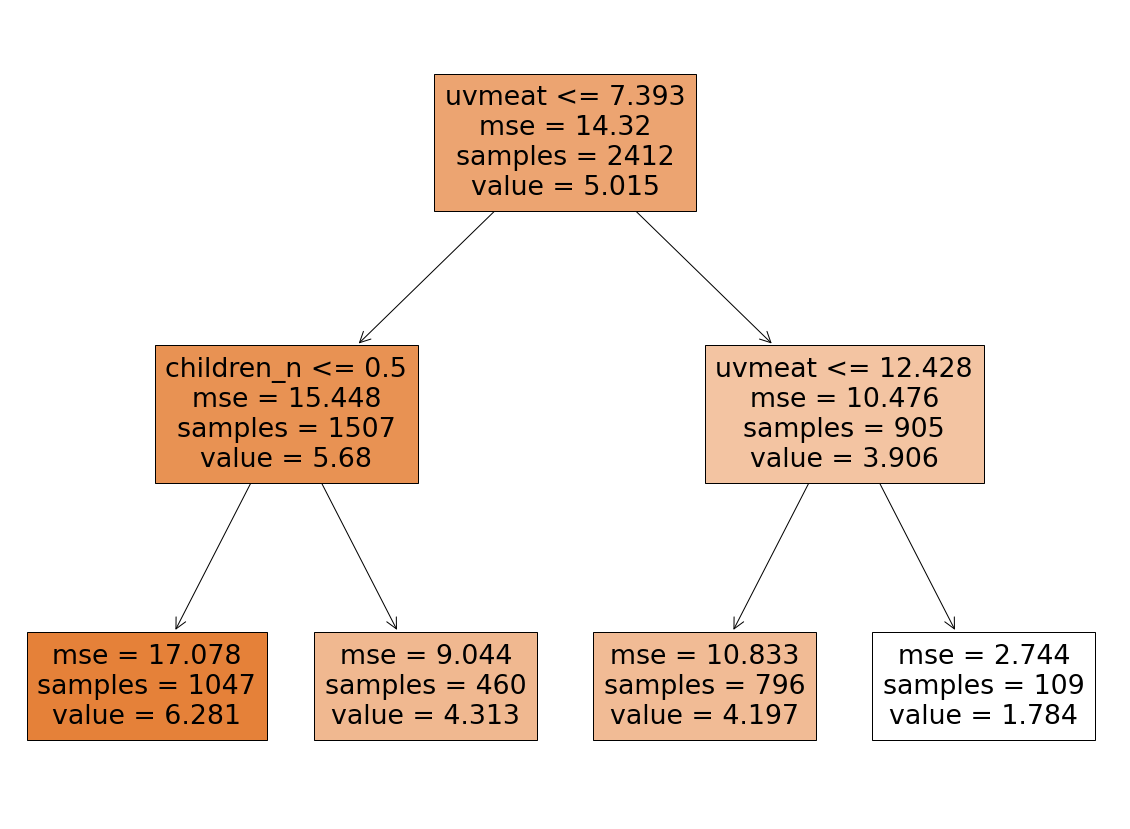

In [478]:
from sklearn.tree import plot_tree
from matplotlib.pyplot import figure
# Your code here

figure(figsize = (20,15))
plot_tree(winner, filled=True, feature_names=X.columns)

## Random Forest Multivariate Regresson
Create a Random forest regressor and fit it on the complete dataset.

For simplicity use the max_depth found in the Decision tree regressor to perform a cross validation and find the best depth for this model.

In [481]:
from sklearn.ensemble import RandomForestRegressor
rndfrst = RandomForestRegressor(random_state=random_state)
rndfrst.fit(Xtrain, ytrain)

param_grid_rf = {'max_depth': list(range(1,max_dpth))}
cv_ests_rf = GridSearchCV(estimator=RandomForestRegressor(random_state=random_state), 
                    param_grid=param_grid_rf, scoring='neg_mean_squared_error') # MSE
cv_ests_rf.fit(Xtrain, ytrain)
winner_rf = cv_ests_rf.best_estimator_ 

y_test_p_tree_rf = winner_rf.predict(Xtest)
rmse_dt_rf = mean_squared_error(ytest, y_test_p_tree_rf, squared=False)
print("accuracy is {}".format(rmse_dt_rf))

accuracy is 3.577734748905506


## Final observations
### Linear regression
The multivariate regression with all the predicting variables available with respect to the univariate regression has 
- lower RMSE 
- higher coefficient of determination 
- the p-value suggests the acceptance of both models
### Decision Tree and Random Forest regression
- Decistion Tree has an RMSE slightly higher than multivariate linear regression
- Random Forest has an RMSE slightly lower than multivariate linear regression


## Control questions
1. observing the multi-variate experiment, what variable has the higher effect on the target?
1. is there a variable having an almost negligible effect on the target?
1. try to repeat the univariate experiment with the other two columns and comment the results